# Property Data - Exploratory Data Analysis (EDA)

This notebook loads the `properti_data_cleaned.csv` file and performs a detailed Exploratory Data Analysis (EDA). The goal is to understand the relationships between different features and the property prices through a series of visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent, professional style for the plots
sns.set_theme(style="whitegrid")

print("Libraries imported successfully.")

Libraries imported successfully.


## Step 1: Load the Cleaned Data
We begin by loading the clean dataset that was prepared by our `preprocessing.ipynb` notebook.

In [2]:
try:
    df = pd.read_csv('properti_data_cleaned.csv')
    print("Successfully loaded 'properti_data_cleaned.csv'.")
    print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
    display(df.head())
except FileNotFoundError:
    print("❌ Error: 'properti_data_cleaned.csv' not found. Please run the preprocessing notebook first.")

Successfully loaded 'properti_data_cleaned.csv'.
The dataset contains 42018 rows and 5 columns.


,City,Bedrooms,Building Area (m²),Land Area (m²),Price
0,tangerang,2,68,130,2300000000
1,tangerang,5,192,128,4200000000
2,tangerang,3,94,158,2800000000
3,tangerang,3,125,144,2800000000
4,tangerang,4,325,270,7500000000


## Visualization 1: Price Distribution

First, let's understand the distribution of property prices. We use a histogram on a logarithmic scale to better visualize the spread, as property prices are often heavily skewed towards the lower end. A vertical red line indicates the median price.

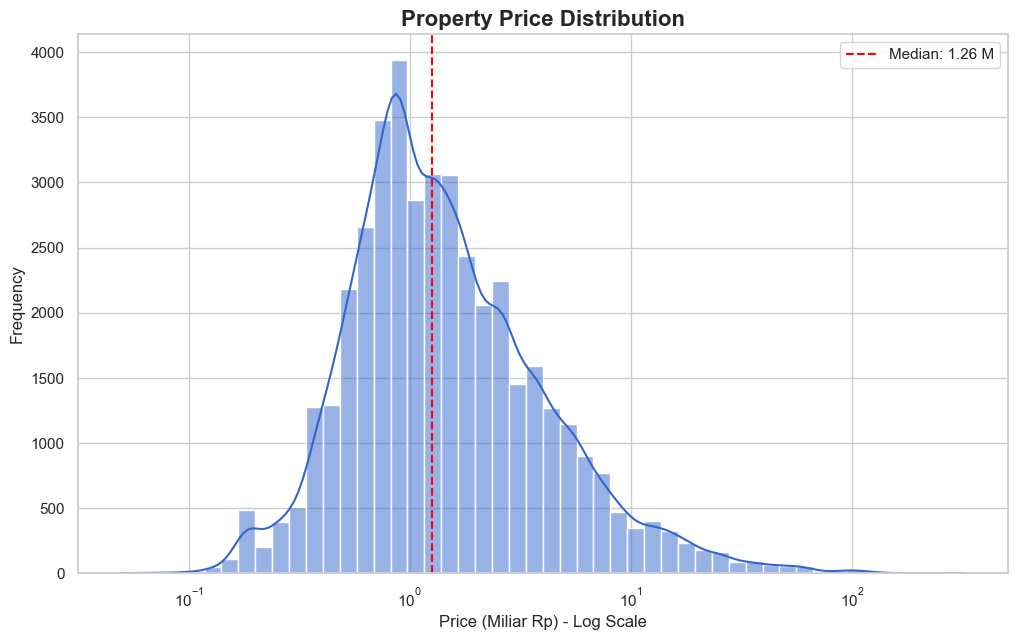

In [3]:
plt.figure(figsize=(12, 7))
price_data = df['Price'] / 1_000_000_000 # Price in Miliar

ax = sns.histplot(price_data, kde=True, bins=50, log_scale=True, color='#3266CC')
ax.set_xlabel('Price (Miliar Rp) - Log Scale', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Property Price Distribution', fontsize=16, fontweight='bold')

median_price = price_data.median()
ax.axvline(median_price, color='red', linestyle='--', label=f'Median: {median_price:.2f} M')
ax.legend()

plt.show()

## Visualization 2: Price Distribution by City

A violin plot is used to compare the price distributions across different cities. This is more informative than a standard box plot as it also shows the density of data at different price points.

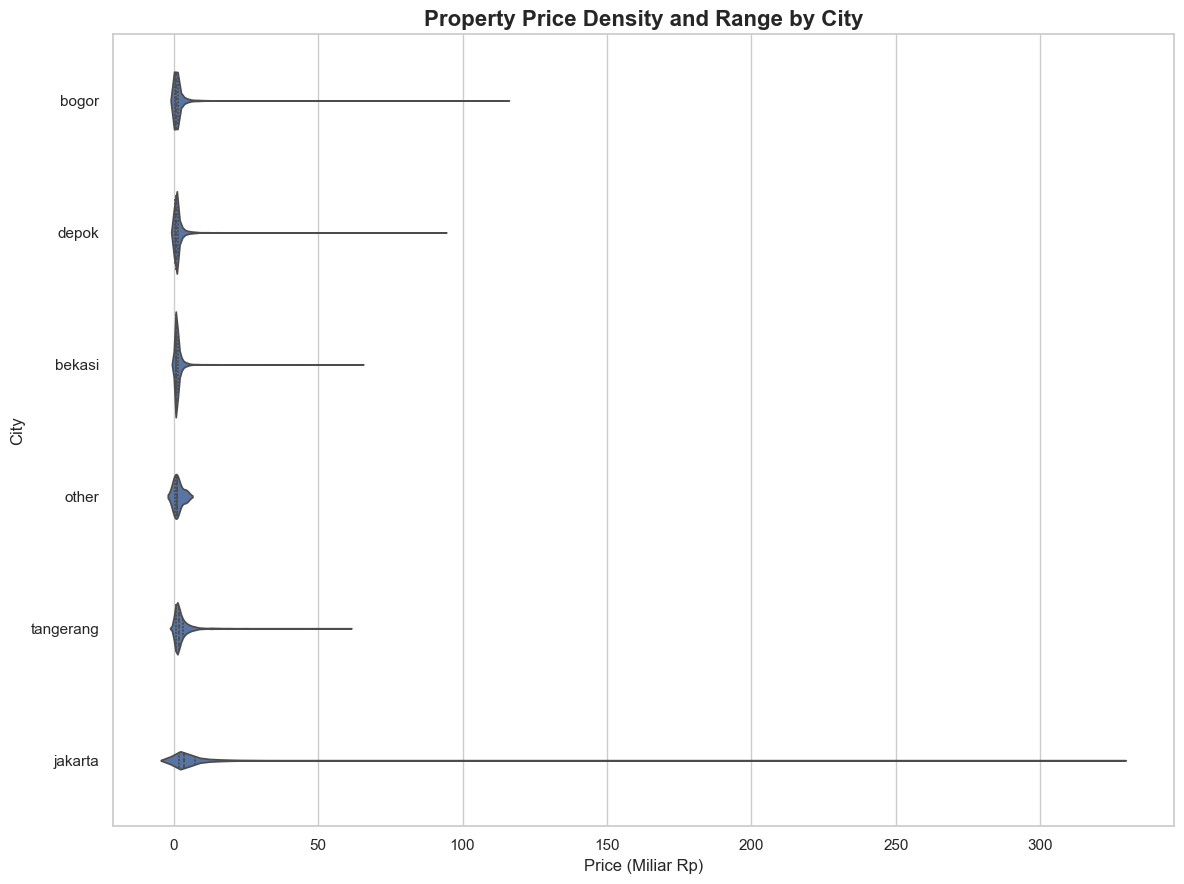

In [4]:
plt.figure(figsize=(12, 9))
city_order = df.groupby('City')['Price'].median().sort_values().index

ax = sns.violinplot(y='City', x=df['Price'] / 1_000_000_000, data=df, order=city_order, inner='quartile')
ax.set_xlabel('Price (Miliar Rp)', fontsize=12)
ax.set_ylabel('City', fontsize=12)
ax.set_title('Property Price Density and Range by City', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

## Visualization 3: Average Price per Square Meter

Price per square meter is a great metric for comparing property value while normalizing for size. This bar chart shows which cities are, on average, the most valuable.

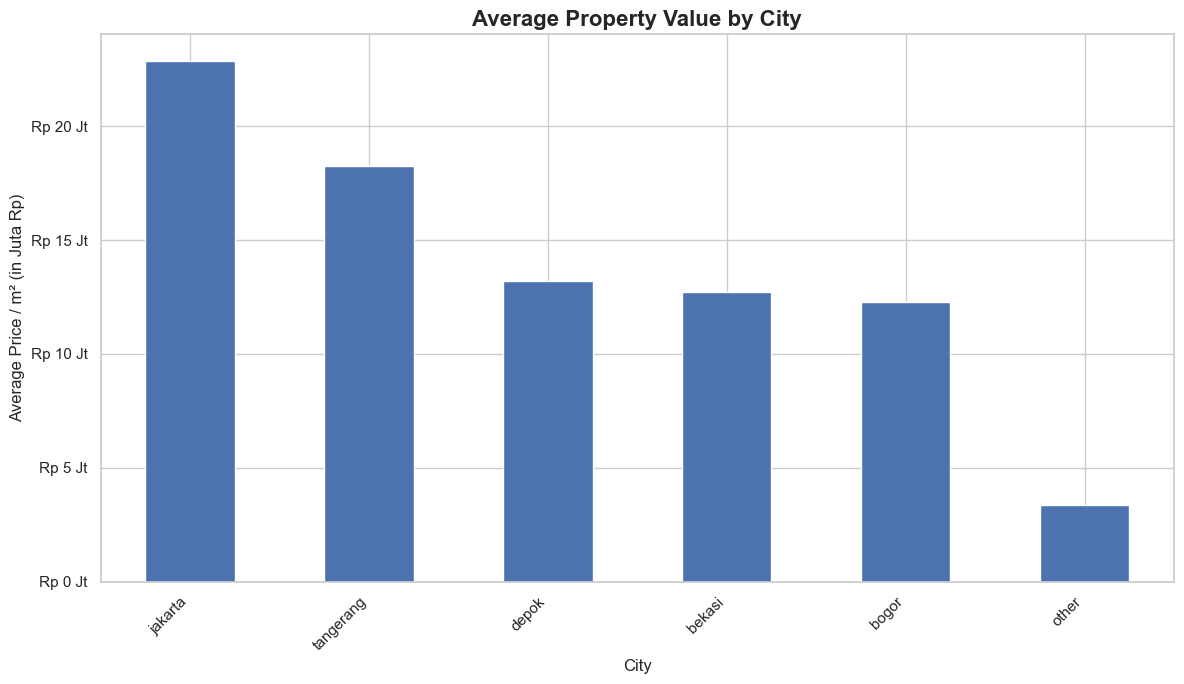

In [5]:
df['price_per_sqm'] = df['Price'] / df['Building Area (m²)']
avg_price_per_sqm = df.groupby('City')['price_per_sqm'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
ax = avg_price_per_sqm.plot(kind='bar')
ax.set_ylabel('Average Price / m² (in Juta Rp)', fontsize=12)
ax.set_xlabel('City', fontsize=12)
ax.set_title('Average Property Value by City', fontsize=16, fontweight='bold')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f"Rp {int(x/1_000_000)} Jt"))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualization 4: Building Area vs. Price by City

This scatter plot helps visualize the relationship between a property's size and its price. By coloring the dots (`hue`) by city, we can see if different cities have different pricing trends for similar-sized homes.

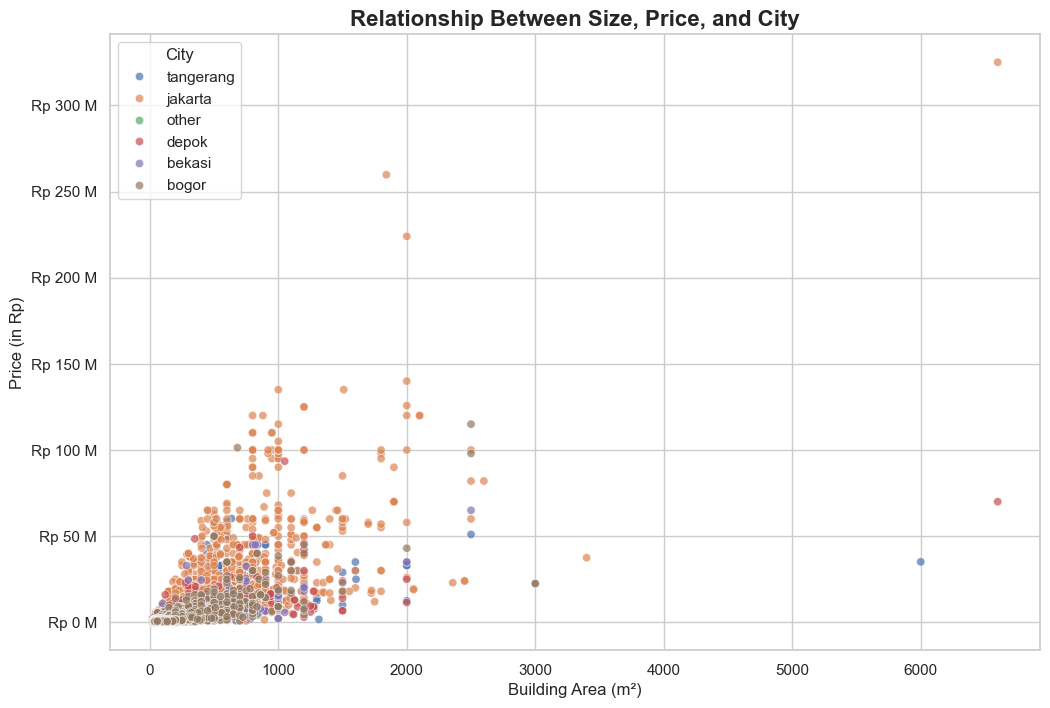

In [6]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x='Building Area (m²)',
    y='Price',
    hue='City',
    data=df,
    alpha=0.7
)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Price (in Rp)", fontsize=12)
ax.set_xlabel("Building Area (m²)", fontsize=12)
ax.set_title('Relationship Between Size, Price, and City', fontsize=16, fontweight='bold')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f"Rp {int(x/1_000_000_000)} M"))
plt.show()

## Visualization 5: Correlation Heatmap

Finally, a correlation heatmap shows the statistical relationship between our numerical features. A value close to 1.0 (dark red) means a strong positive correlation (e.g., as area increases, price increases), while a value close to -1.0 (dark blue) would mean a strong negative correlation.

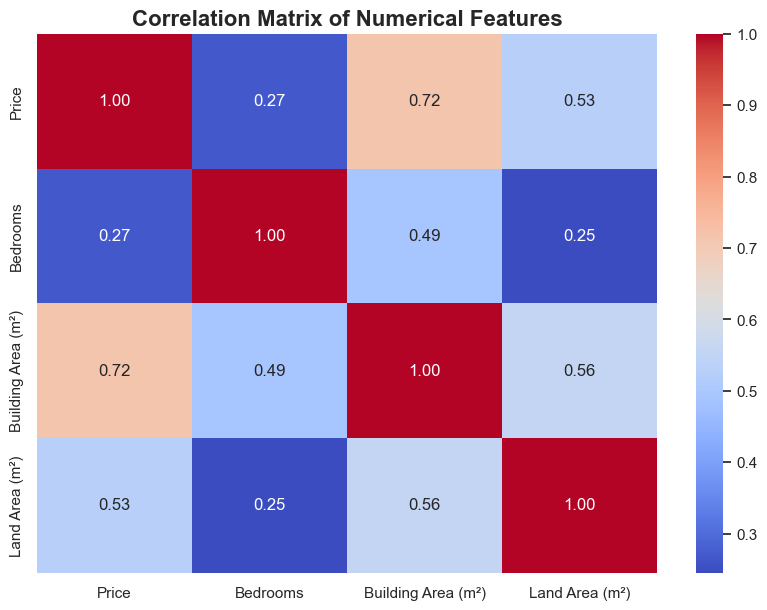

In [7]:
plt.figure(figsize=(10, 7))
numerical_cols = ['Price', 'Bedrooms', 'Building Area (m²)', 'Land Area (m²)']
correlation_matrix = df[numerical_cols].corr()

ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
ax.set_title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.show()